In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
path = 'Data/000/Trajectory'

In [3]:
# read plt
def read_plt(plt_file):
    data = pd.read_csv(plt_file, skiprows=6, header=None)
    data.columns = ['lat', 'lon', '0', 'alt', 'num', 'date', 'time']
    data = data.drop(['0', 'num'], axis=1)
    return data

In [58]:
df = read_plt(path + '/20081023025304.plt')
# add coloum traj_id filled with 0
df['track_id'] = 0
df['t'] = pd.to_datetime(df['date'] + ' ' + df['time'])
# drop date and time
df = df.drop(['date', 'time'], axis=1)
df.set_index('t', inplace=True)

In [59]:
df.head()
# 39.984702,116.318417,0,492,39744.1201851852,2008-10-23,02:53:04

,lat,lon,alt,track_id
t,,,,
2008-10-23 02:53:04,39.984702,116.318417,492,0
2008-10-23 02:53:10,39.984683,116.318450,492,0
2008-10-23 02:53:15,39.984686,116.318417,492,0
2008-10-23 02:53:20,39.984688,116.318385,492,0
2008-10-23 02:53:25,39.984655,116.318263,492,0


In [60]:
def plot_trajectory(df):
    # Tworzymy mapę bazową
    plt.figure(figsize=(10, 8))
    m = Basemap(projection='mill', llcrnrlat=df['lat'].min(), urcrnrlat=df['lat'].max(),
                llcrnrlon=df['lon'].min(), urcrnrlon=df['lon'].max(), resolution='c')

    # Dodajemy punkty trajektorii na mapę
    m.scatter(df['lon'], df['lat'], latlon=True, s=10, c='red', alpha=0.5)

    # Dodajemy linie łączące punkty trajektorii
    m.plot(df['lon'], df['lat'], latlon=True, c='blue', linewidth=1)

    # Dodajemy tytuł i etykiety osi
    plt.title('Trajectory Visualization')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Wyświetlamy mapę
    plt.show()

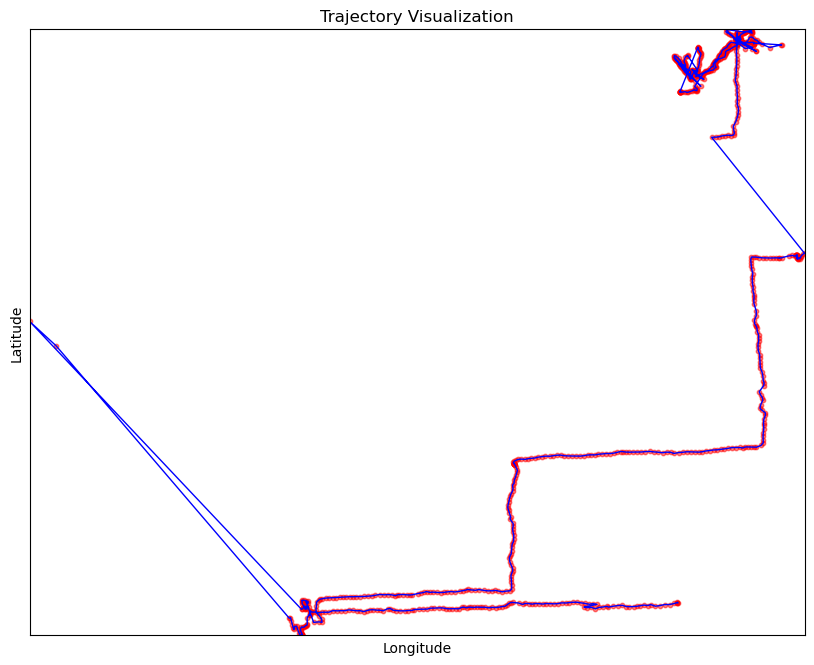

In [61]:
plot_trajectory(df)

# MOVINGPANDAS

In [66]:
import geopandas as gpd
from shapely.geometry import Point
from movingpandas import TrajectoryCollection

# Tworzenie DataFrame z danymi trajektorii
geometry = [Point(lon, lat) for lon, lat in zip(df['lon'], df['lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs={'init': 'epsg:4326'})
gdf.index

/Users/szymonleszkiewicz/anaconda3/lib/python3.11/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


DatetimeIndex(['2008-10-23 02:53:04', '2008-10-23 02:53:10',
               '2008-10-23 02:53:15', '2008-10-23 02:53:20',
               '2008-10-23 02:53:25', '2008-10-23 02:53:30',
               '2008-10-23 02:53:35', '2008-10-23 02:53:40',
               '2008-10-23 02:53:45', '2008-10-23 02:53:50',
               ...
               '2008-10-23 11:10:27', '2008-10-23 11:10:32',
               '2008-10-23 11:10:37', '2008-10-23 11:10:42',
               '2008-10-23 11:10:47', '2008-10-23 11:10:52',
               '2008-10-23 11:10:57', '2008-10-23 11:11:02',
               '2008-10-23 11:11:07', '2008-10-23 11:11:12'],
              dtype='datetime64[ns]', name='t', length=908, freq=None)

In [67]:
gdf.head()

,lat,lon,alt,track_id,geometry
t,,,,,
2008-10-23 02:53:04,39.984702,116.318417,492,0,POINT (116.31842 39.98470)
2008-10-23 02:53:10,39.984683,116.318450,492,0,POINT (116.31845 39.98468)
2008-10-23 02:53:15,39.984686,116.318417,492,0,POINT (116.31842 39.98469)
2008-10-23 02:53:20,39.984688,116.318385,492,0,POINT (116.31839 39.98469)
2008-10-23 02:53:25,39.984655,116.318263,492,0,POINT (116.31826 39.98465)


In [68]:
# Tworzenie kolekcji trajektorii
traj_collection = TrajectoryCollection(gdf, 'track_id')

In [69]:
# Przykładowa analiza (prędkość i przyspieszenie)
traj_collection.add_speed(overwrite=True)
traj_collection.add_acceleration(overwrite=True)

<Axes: >

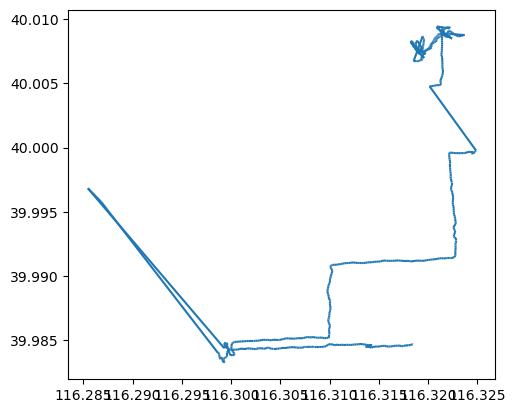

In [73]:
traj_collection.plot()